<!--NAVIGATION-->
< [Cruise Trajectory](CruiseTrajectory.ipynb) | [Index](Index.ipynb) | [Match (colocalize) Cruise Track with Datasets](MatchCruise.ipynb) >

<a href="https://colab.research.google.com/github/simonscmap/pycmap/blob/master/docs/Match.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## *match(sourceTable, sourceVar, targetTables, targetVars, dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2, temporalTolerance, latTolerance, lonTolerance, depthTolerance)*

Colocalizes the source variable (from source table) with the target variable (from target table). The matching results rely on the tolerance parameters because they set the matching boundaries between the source and target datasets. Notice the source has to be a single non-climatological variable. You may pass empty string ('') as source variable if you only want to get the time and location info from the source table. Please note that the number of matching entries between each target variable and the source variable might vary depending on the temporal and spatial resolutions of the target variable. In principle, if the source dataset is fully covered by the target variable's spatio-temporal range, there should always be matching results if the tolerance parameters are larger than half of their corresponding spatial/temporal resolutions. Please explore the [catalog](Catalog.ipynb) to find appropriate target  variables. 

<br />This method returns a dataframe containing the source variable joined with the target variable(s).


### Note
Currently, the 'match' method is not optimized for matching very large subsets of massive datasets such as models and satellites. It would be best to use this method to colocalize in-situ measurements such as station-based or underway cruise datasets (which are typically 'small') with any other datasets (models, satellites, or other observations). 
<br />Stay tuned!

> **Parameters:** 
>> **sourceTable: string**
>>  <br />Table name of the source dataset. A full list of table names can be found in [catalog](Catalog.ipynb).
>> <br />
>> <br />**sourceVar: string**
>>  <br />The source variable short name. The target variables are matched (colocalized) with this variable. A full list of variable short names can be found in [catalog](Catalog.ipynb).
>> <br />
>> <br />**targetTables: list of string**
>>  <br />Table names of the target datasets to be matched with the source data. Notice source dataset can be matched with multiple target datasets. A full list of table names can be found in [catalog](Catalog.ipynb).
>> <br />
>> <br />**targetVars: list of string**
>>  <br />Variable short names to be matched with the source variable. A full list of variable short names can be found in [catalog](Catalog.ipynb).
>> <br />
>> <br />**dt1: string**
>>  <br />Start date or datetime. Both source and target datasets are filtered before matching. This parameter sets the lower bound of the temporal cut.
>> <br />
>> <br />**dt2: string**
>>  <br />End date or datetime. Both source and target datasets are filtered before matching. This parameter sets the upper bound of the temporal cut.
>> <br />
>> <br />**lat1: float**
>>  <br />Start latitude [degree N]. Both source and target datasets are filtered before matching. This parameter sets the lower bound of the meridional cut. Note latitude ranges from -90 to 90 degrees.
>> <br />
>> <br />**lat2: float**
>>  <br />End latitude [degree N]. Both source and target datasets are filtered before matching. This parameter sets the upper bound of the meridional cut. Note latitude ranges from -90 to 90 degrees.
>> <br />
>> <br />**lon1: float**
>>  <br />Start longitude [degree E]. Both source and target datasets are filtered before matching. This parameter sets the lower bound of the zonal cut. Note longitude ranges from -180 to 180 degrees.
>> <br />
>> <br />**lon2: float**
>>  <br />End longitude [degree E]. Both source and target datasets are filtered before matching. This parameter sets the upper bound of the zonal cut. Note longitude ranges from -180 to 180 degrees.
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. Both source and target datasets are filtered before matching. This parameter sets the lower bound of the vertical cut. Note depth is a positive number (depth is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. Both source and target datasets are filtered before matching. This parameter sets the upper bound of the vertical cut. Note depth is a positive number (depth is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**temporalTolerance: list of int**
>> <br />Temporal tolerance values between pairs of source and target datasets. The size and order of values in this list should match those of targetTables. If only a single integer value is given, that would be applied to all target datasets. This parameter is in day units except when the target variable represents monthly climatology data in which case it is in month units. Notice fractional values are not supported in the current version.
>> <br />
>> <br />**latTolerance: list of float or int**
>> <br />Spatial tolerance values in meridional direction [deg] between pairs of source and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. A "safe" value for this parameter can be slightly larger than the half of the traget variable's spatial resolution.
>> <br />
>> <br />**lonTolerance: list of float or int**
>> <br />Spatial tolerance values in zonal direction [deg] between pairs of source and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. A "safe" value for this parameter can be slightly larger than the half of the traget variable's spatial resolution.
>> <br />
>> <br />**depthTolerance: list of float or int**
>> <br />Spatial tolerance values in vertical direction [m] between pairs of source and target datasets. The size and order of values in this list should match those of targetTables. If only a single float value is given, that would be applied to all target datasets. 

>**Returns:** 
>>  Pandas dataframe.

### Example 1

In this example the abundance of a prochlorococcus strain (MIT9313PCR, see lines 5-6) measured by [Chisholm lab](https://chisholmlab.mit.edu/) during the AMT13 cruise (Atlantic Meridional Transect Cruise 13) is colocalized with 3 target variables (lines 7-8):<br />
* 'MIT9312PCR_Chisholm' from the same source dataset
* 'phosphate_WOA_clim' from World Ocean Atlas monthly climatology dataset
* 'chl' (chlorophyll) from weekly averaged satellite dataset

<br />**Tip1:**<br /> 
The space-time cut parameters (lines 9-16) have been set in such a way to encompass the entire source dataset 'tblAMT13_Chisholm' (see the [dataset page](https://cmap.readthedocs.io/en/latest/catalog/datasets/Chisholm_AMT13.html#chisholm-amt13) for more details). Notice that the last data point at the source dataset has been measured at '2003-10-12 12:44:00'. For simplicity dt2 has been set to '2003-10-13', but you could also use the exact date-time '2003-10-12 12:44:00'. 

<br />**Tip2:**<br /> 
AMT13 cruise trajectory is already in Simons CMAP database. Therefore, another way to find reasonable values for the space-time cut parameters (lines 9-16) is to use the outputs of the following command:<br />
`api.cruise_bounds('AMT13')`

<br />**Tip3:**<br /> 
The temporalTolerance parameter is set to [0, 0, 1] (line 17). This means:
* &#177;0 day temporal tolerance when matching with 'MIT9312PCR_Chisholm' (exact date-time matching)
* &#177;0 month temporal tolerance when matching with 'phosphate_WOA_clim'  (this is a monthly climatology dataset)
* &#177;4 day temporal tolerance when matching with 'chl' (this is a weekly averaged dataset)

<br />**Tip4:**<br /> 
The latTolerance and lonTolerance parameters are set to [0, 0.5, 0.25] (lines 18-19). This means:
* &#177;0 degree spatial tolerances (in meridional and zonal directions) when matching with 'MIT9312PCR_Chisholm' (exact lat/lon matching)
* &#177;0.5 degrees spatial tolerances (in meridional and zonal directions) when matching with 'phosphate_WOA_clim'  (this dataset has a 1 degree spatial resolution)
* &#177;0.25 degrees spatial tolerances (in meridional and zonal directions) when matching with 'chl'. This dataset has 0.25 degree spatial resolution which means one may reduce the spatial tolerance for this target dataset down to 0.25/2 = 0.125 degrees.

<br />**Tip5:**<br /> 
The depthTolerance parameter is set to [0, 5, 0] (line 20). This means:
* &#177;0 meters vertical tolerances when matching with 'MIT9312PCR_Chisholm' (exact depth matching)
* &#177;5 meters vertical tolerances when matching with 'phosphate_WOA_clim' (note that this dataset, similar to model outputs, does not have uniform depth levels)

In [ ]:
#!pip install pycmap -q     #uncomment to install pycmap, if necessary

import pycmap

api = pycmap.API(token='<YOUR_API_KEY>')
api.match(
         sourceTable='tblAMT13_Chisholm', 
         sourceVar='MIT9313PCR_Chisholm',
         targetTables=['tblAMT13_Chisholm', 'tblWOA_Climatology', 'tblChl_REP'],
         targetVars=['MIT9312PCR_Chisholm', 'phosphate_WOA_clim', 'chl'],
         dt1='2003-09-14', 
         dt2='2003-10-13', 
         lat1=-48, 
         lat2=48, 
         lon1=-52, 
         lon2=-11, 
         depth1=0, 
         depth2=240, 
         temporalTolerance=[0, 0, 1],
         latTolerance=[0, 0.5, 0.25],
         lonTolerance=[0, 0.5, 0.25],
         depthTolerance=[0, 5, 0]
         )

<br /><br />


### Example 2

The source variable in this example is particulate pseudo cobalamin ('Me_PseudoCobalamin_Particulate_pM' see lines 5-6) measured by [Ingalls lab](https://sites.google.com/view/anitra-ingalls) during the KM1315 cruise (see [dataset page](https://cmap.readthedocs.io/en/latest/catalog/datasets/cobalamines.html#cobalamins) for more details). This variable is colocalized with one target variabele, 'picoprokaryote' concentration, from [Darwin model](http://darwinproject.mit.edu/) (lines 7-8). The colocalized data, then is visualized. please review the above Example 1, since the mentioned tips apply to this example too.


<br />**Tip1:**<br /> 
The employed Darwin model outputs in this example is a 3-day averaged dataset, and therefore &#177;2 day temporal tolerance is used (line 17).

<br />**Tip2:**<br /> 
The employed Darwin model outputs in this example has a 0.5 degree spatial resolution in zonal and meridional directions, and so &#177;0.25 degree spatial tolerance is used (line 18-19).

<br />**Tip3:**<br /> 
Darwin model first depth level is at 5 m (not 0), and so &#177;5 meter vertical tolerance should cover all surface measurements (line 20).



1: picoprokaryote matched.



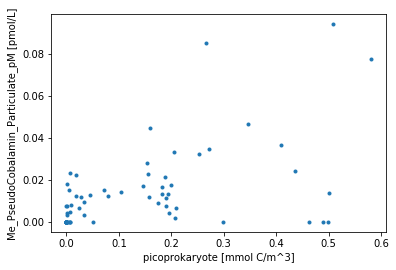

In [3]:
# !pip install pycmap -q     # uncomment to install pycmap, if necessary

%matplotlib inline
import matplotlib.pyplot as plt
import pycmap

api = pycmap.API(token='<YOUR_API_KEY>')
df = api.match(
              sourceTable='tblKM1314_Cobalmins', 
              sourceVar='Me_PseudoCobalamin_Particulate_pM',
              targetTables=['tblDarwin_Phytoplankton'],
              targetVars=['picoprokaryote'],
              dt1='2013-08-11', 
              dt2='2013-09-05', 
              lat1=22.5, 
              lat2=50, 
              lon1=-159, 
              lon2=-128, 
              depth1=0, 
              depth2=300, 
              temporalTolerance=[2],
              latTolerance=[0.25],
              lonTolerance=[0.25],
              depthTolerance=[5]
              )


plt.plot(df['picoprokaryote'], df['Me_PseudoCobalamin_Particulate_pM'], '.')
plt.xlabel('picoprokaryote' + api.get_unit('tblDarwin_Phytoplankton', 'picoprokaryote'))
plt.ylabel('Me_PseudoCobalamin_Particulate_pM' + api.get_unit('tblKM1314_Cobalmins', 'Me_PseudoCobalamin_Particulate_pM'))
plt.show() 